In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/ds_salaries (ML) (1).csv")  
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21703915520.0000 - val_loss: 20097273856.0000
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19679006720.0000 - val_loss: 14925595648.0000
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13848365056.0000 - val_loss: 7416174592.0000
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5971473920.0000 - val_loss: 4872523776.0000
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4179284992.0000 - val_loss: 4892193792.0000
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4512419328.0000 - val_loss: 4881104896.0000
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4295867904.0000 - val_loss: 4862840832.0000
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4320460288.0000 - val_loss: 4846161920.0000
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4405776896.0000 - val_loss: 4830530560.0000
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4184744192.0000 - val_loss: 4

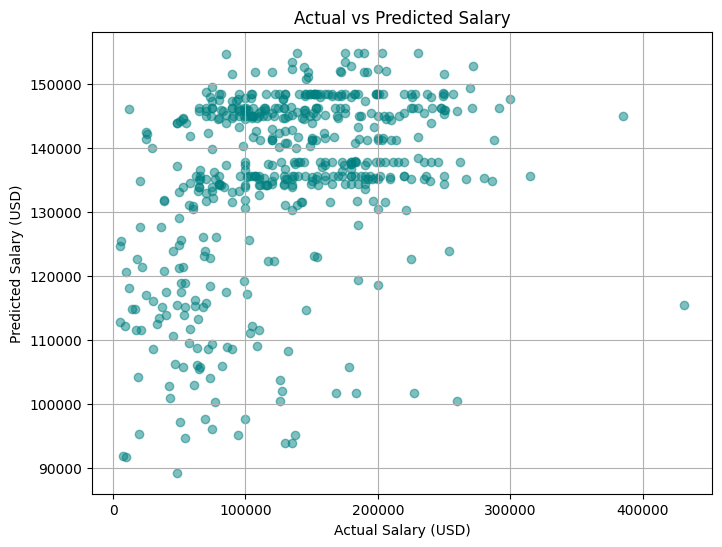

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# STEP 1: Load the dataset (make sure the name matches your uploaded file)
df = pd.read_csv("/content/sample_data/ds_salaries (ML) (1).csv")

# STEP 2: Drop unnecessary columns
df = df.drop(['salary', 'salary_currency'], axis=1)

# STEP 3: Remove duplicate records
df = df.drop_duplicates()

# STEP 4: Encode categorical columns using LabelEncoder
label_cols = ['experience_level', 'employment_type', 'job_title',
              'employee_residence', 'company_location', 'company_size']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# STEP 5: Feature and target separation
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# STEP 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Build and train ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# STEP 8: Make predictions
y_pred = model.predict(X_test).flatten()

# STEP 9: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# STEP 10: Visualize predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()